

```
# This is formatted as code
```

**Francis O'Hara**

Fall 2024

CS 251: Data Analysis and Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2 | Categorical and Exploratory Data Analysis

## Task 0: Get set up

### 0a. Download and copy files
1. Copy over your `data.py` and `analysis.py` files from Project 1 into your Project 2 working directory.
2. Download the Project 2 code templates (`categorical_data.py` and `categorical_analysis.py`) into your Project 2 working directory.
3. Create a subfolder called `data` and download the Austin Pet Dataset (`austin_pet.csv`) and `test_data_mixed.csv` to your working directory.
4. Copy `charts.py` from Lab 2 into your Project 2 folder.

**NOTE:** If you did not add support for missing data in your `Data` class, download `austin_pet_no_missing.csv` instead of `austin_pet.csv`.

### 0b. Questions

**Question 1:** Open `austin_pet.csv` in a text editor and examine the Austin Pet dataset. Name and briefly explain two reasons why data may be missing.

**Answer 1:**  
1. Certain variables in a dataset are sometimes updated in real-time as events occur. Hence, one possible cause of missing data is that a variable may be tracking the occurrence of a real-world event that may not have occurred yet.
2. Sometimes a lot of information may be known about some of the observations in the dataset while very little is known about other observations in the dataset, and for observations where nothing is known about a particular variable's value for that observation, it will be represented as missing data. For example, regarding the in_age column in the austin_pet dataset, it is possible that for some animals, their age was not known at the time they were brought into the shelter and hence their in_age column value was represented as missing data.

## Task 1: Techniques for exploratory data analysis that leverage categorical data

The Austin Pet Dataset contains mostly **categorical data variables**. In this task, your goal is to implement and test some helpful methods for working with categorical variables and their levels. We will focus on 2 techniques for performing exploratory data analysis that involve categorical data:
1. computing the number of samples that have different levels of specific categorical variables of interest.
2. filtering a dataset based on the level of a categorical variable.

Before applying your tools to analyze the Austin Pet Dataset, as is usally a good idea, you will test your code on smaller and simpler test datasets (`test_data_mixed.csv` and `iris.csv`) to help verify that everything works.

### 1a. Helper methods to convert between string and numeric categorical variable level representations

Recall that the `self.data` 2D ndarray in your `Data` class contains numeric representations of categorical variables. For example, you may store the float `0.0` for the `Dog` level of the variable `animal_type`, `1.0` for the `Cat` level, etc. The mapping between the numeric and string representations is stored separately from the `self.data` ndarray (i.e. as the `self.cats2levels` dictionary).

Implement the following helper methods of the `CatData` class in `categorical_data.py` that convert between the numeric and string representation of each categorical variable level.
- `get_cat_levels_str(self, header)`
- `get_cat_levels_int(self, header)`
- `int2strlevels(self, header, int_levels)`
- `str2intlevels(self, header, str_levels)`

Use the code below to test your code.

In [6]:
from categorical_data import CatData
import numpy as np

In [7]:
d_test = CatData(filepath='data/test_data_mixed.csv')

##### Test `get_cat_levels_str`

In [8]:
print('Your string coded levels for the categorical variable spirit_animal:')
test_level_strings = d_test.get_cat_levels_str('spirit_animal')
print(test_level_strings)
print("and it should look like:\n['Penguin' 'Koala' 'Frog']")

if type(test_level_strings) is not np.ndarray:
    print('\nYour get_cat_levels_str is not returning an ndarray but it should be.\nDid you remember to cast your list of strings with np.array?')


Your string coded levels for the categorical variable spirit_animal:
['Penguin' 'Koala' 'Frog']
and it should look like:
['Penguin' 'Koala' 'Frog']


##### Test `get_cat_levels_int`

In [9]:
print('Your int coded levels for the categorical variable spirit_animal:')
test_level_ints = d_test.get_cat_levels_int('spirit_animal')
print(test_level_ints)
print("and it should look like:\n[0 1 2]")

if not isinstance(test_level_ints, np.ndarray):
    print('\nYour get_cat_levels_int is not returning an ndarray but it should be.\nDid you remember to cast your list of ints with np.array?')

if test_level_ints.dtype != np.int64:
    print('Your ndarray dtype is not int, but it should be.')

Your int coded levels for the categorical variable spirit_animal:
[0 1 2]
and it should look like:
[0 1 2]


##### Test `int2strlevels`

In [10]:
print('Converting your int coded levels into string coded levels for spirit_animal, we get:')
print(d_test.int2strlevels('spirit_animal', d_test.get_cat_levels_int('spirit_animal')))
print("and it should look like:\n['Penguin', 'Koala', 'Frog']")


Converting your int coded levels into string coded levels for spirit_animal, we get:
['Penguin', 'Koala', 'Frog']
and it should look like:
['Penguin', 'Koala', 'Frog']


##### Test `str2intlevels`

In [11]:
print('Converting your string coded levels into int coded levels for spirit_animal, we get:')
print(d_test.str2intlevels('spirit_animal', ['Penguin', 'Koala', 'Frog']))
print("and it should look like:\n[0, 1, 2]")

Converting your string coded levels into int coded levels for spirit_animal, we get:
[0, 1, 2]
and it should look like:
[0, 1, 2]


### 1b. Categorical data analysis technique (1/2): Counting the number of data samples that have the same categorical variable level

The Austin Pet dataset has almost 200,000 samples (!) and is mostly comprised of categorical variables. A helpful way to explore such a large dataset is to compute and visualize the number of samples that have different levels of specific categorical variables of interest. For example, we can use this analysis to answer the question: *How many animals arrived to the shelter each year since 2013?*

In `categorical_analysis.py` implement the `cat_count(self, header)` method in the `CatAnalysis` class.

Run the below code to test your implementation.

<!-- For the the `test_data_mixed.csv` dataset, use your `cat_count` implementation to compute number of samples that have each level of the variables
- `fav_color`
- `spirit_animal` -->

You should get the following results:

```
fav_color:
The levels are ['Purple' 'Yellow' 'Black']
and the counts for each level are
[4 4 1]
spirit_animal:
The levels are ['Penguin' 'Koala' 'Frog']
and the counts for each level are
[3 3 3]
```

In [12]:
from categorical_analysis import CatAnalysis

In [13]:
d_mix = CatData(filepath='data/test_data_mixed.csv')
a_mix = CatAnalysis(d_mix)

print('fav_color:')
counts, levels = a_mix.cat_count('fav_color')
print(f"The levels are {levels}\nand the counts for each level are\n{counts}")

print('spirit_animal:')
counts, levels = a_mix.cat_count('spirit_animal')
print(f"The levels are {levels}\nand the counts for each level are\n{counts}")

fav_color:
The levels are ['Purple' 'Yellow' 'Black']
and the counts for each level are
[4 4 1]
spirit_animal:
The levels are ['Penguin' 'Koala' 'Frog']
and the counts for each level are
[3 3 3]


### 1c. Create a horizontal bar chart to plot categorical counts

Run the below test code to create a horizontal bar plot of the counts you obtained for the `fav_color` categorical variable. If everything is working as expected, you should get a plot that looks like this:

![example_barchart.png](attachment:8973b1cd-bb37-4da0-9b14-c302b3651f73.png)

In [14]:
import charts

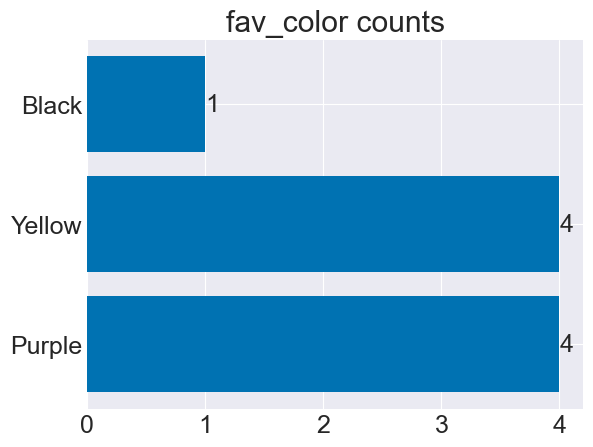

In [15]:
a_mix = CatAnalysis(d_test)
counts, levels = a_mix.cat_count('fav_color')
charts.sidebarplot(values=counts, labels=levels, title='fav_color counts')

### 1d. Test `sort` function in `charts.py`

Run the below test code to make sure that the `sort` function that you wrote in Lab 2 in `charts.py` works in the following cases.

In [16]:
test_labels = np.array(['c', 'a', 'd', 'b'], dtype=str)
test_values = np.array([20, 40, 10, 30], dtype=int)

# Test sorting by value
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='value')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['d' 'c' 'b' 'a']\nThe values are:\n{test_values_sort}\nand should be\n[10 20 30 40]")

After sorting by value, the labels are:
['d' 'c' 'b' 'a']
and should be
['d' 'c' 'b' 'a']
The values are:
[10 20 30 40]
and should be
[10 20 30 40]


In [17]:
# Test sorting by label
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='label')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['a' 'b' 'c' 'd']\nThe values are:\n{test_values_sort}\nand should be\n[40 30 20 10]")

After sorting by value, the labels are:
['a' 'b' 'c' 'd']
and should be
['a' 'b' 'c' 'd']
The values are:
[40 30 20 10]
and should be
[40 30 20 10]


In [18]:
# Test no sorting
test_values_sort, test_labels_sort = charts.sort(test_values, test_labels, sort_by='na')
print(f"After sorting by value, the labels are:\n{test_labels_sort}\nand should be\n['c' 'a' 'd' 'b']\nThe values are:\n{test_values_sort}\nand should be\n[20 40 10 30]")

After sorting by value, the labels are:
['c' 'a' 'd' 'b']
and should be
['c' 'a' 'd' 'b']
The values are:
[20 40 10 30]
and should be
[20 40 10 30]


### 1e. Categorical data analysis technique (2/2): Filter a dataset by a categorical level

This technique allows us to focus the analysis on samples that have a specific categorical level of interest. For example, how many animals arrive to the shelter who are in Sick condition?

In order to perform this type of analysis, implement the following methods in your `CatData` class:
- `reset_dataset`
- `filter(self, header, strlevel)`

The below test code filters the dataset based on the `'Purple'` level of the categorical variable `'fav_color'`, prints out the dataset, then repeats the process, but this time filtering by `'Koala'` level of the categorical variable `'spirit_animal'`.

You should get something that looks like the following (*the entries are important, not the formatting*):

```
Filtering by Purple level of fav_color:
-------------------------------
data/test_data_mixed.csv (4x7)
Headers:
  age	fav_color	shoe_size	height	fav_pastime	spirit_animal	fav_food
-------------------------------
30.0	0.0	7.5	160.0	0.0	0.0	0.0
25.0	0.0	10.5	180.0	0.0	0.0	1.0
35.0	0.0	8.0	170.0	1.0	2.0	2.0
31.0	0.0	11.0	185.0	2.0	0.0	1.0

-------------------------------
Filtering by Koala level of spirit_animal:
-------------------------------
data/test_data_mixed.csv (3x7)
Headers:
  age	fav_color	shoe_size	height	fav_pastime	spirit_animal	fav_food
-------------------------------
22.0	1.0	9.0	175.0	0.0	1.0	1.0
28.0	1.0	6.5	155.0	1.0	1.0	1.0
27.0	1.0	6.0	158.0	2.0	1.0	2.0

-------------------------------
```

**Note:** You should reset the dataset each time before you filter. This is prevent the filters from compounding, which can be useful but is not desired here. For the remainder of your project, it would be a good idea to reset the dataset before running any analyses to prevent any filters that were applied previously from unintentionally influencing your results.

In [19]:
d_test = CatData(filepath='data/test_data_mixed.csv')
d_test.reset_dataset()
d_test.filter('fav_color', 'Purple')
print('Filtering by Purple level of fav_color:')
print(d_test)
d_test.reset_dataset()
d_test.filter('spirit_animal', 'Koala')
print('Filtering by Koala level of spirit_animal:')
print(d_test)

Filtering by Purple level of fav_color:
  age    fav_color    shoe_size    height    fav_pastime    spirit_animal    fav_food  
---------------------------------------------------------------------------------------
 30.0  0.0  7.5   160.0  0.0  0.0  0.0 
 25.0  0.0  10.5  180.0  0.0  0.0  1.0 
 35.0  0.0  8.0   170.0  1.0  2.0  2.0 
 31.0  0.0  11.0  185.0  2.0  0.0  1.0 

Filtering by Koala level of spirit_animal:
  age    fav_color    shoe_size    height    fav_pastime    spirit_animal    fav_food  
---------------------------------------------------------------------------------------
 22.0  1.0  9.0  175.0  0.0  1.0  1.0 
 28.0  1.0  6.5  155.0  1.0  1.0  1.0 
 27.0  1.0  6.0  158.0  2.0  1.0  2.0 



## Task 2: Exploratory data analysis of the Austin Pet dataset focusing on when do animals arrive at the shelter and in what condition

Apply the toolbox of categorical data analysis techniques that you implemented to gain insight about Austin Pet dataset. Each of the following subtasks focus on a specific exploratory question related to when do animals arrive at the shelter and in what condition.

For each of the following subtasks:
1. Decide on the relevant variable(s) in the Austin Pet dataset to explore. Consult the below description for the meaning of each variable in the dataset.
2. Decide on whether filtering should be used before computing categorical level counts to address the question.
3. Create **ONE** "high quality" horizontal bar chart showing the result of your analysis (titled, labeled, etc.).
4. In several sentences, interpret the results of your analysis in the context of the question. What insight did we gain?

<!-- 2. Decide on which of the 3 analysis techniques are appropriate to address the question. In most cases, **ONE** technique should be selected, but if filtering is needed, it should be combined with one of the other two techniques. -->

### The Austin Pet Dataset

In this project, you will perform **exploratory data analysis** on a large, complex, real-world dataset — the Austin Pet Dataset. The city of Austin, TX operates the largest "No Kill" animal shelter in the US and makes detailed data on each animal that enters and/or leaves publicly available. Data-driven insights that members of the community (*yourself included!*) could be used to help the animals. For example, the shelter could help improve animal care, increase adoption rates, etc. The data record goes from October 1, 2013 to present (2023).

Here is the official website: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

Here is the list of the variables (*headers*) in the dataset, along with brief descriptions:
- **animal_id**: Unique numeric (int) ID assigned to each animal that enters the shelter (e.g. `664450`).
- **name**: The name of the animal (e.g. `Miss Kitty`), if known.
- **in_reason**: The reason why the animal entered the shelter (e.g. `Stray`).
- **in_condition**: The condition of the animal at the time of arrival at the shelter (e.g. `Normal`, `Sick`).
- **animal_type**: The type of animal (e.g. `Dog`, `Cat`).
- **breed**: The breed of the animal (e.g. `Labrador Retriever Mix`).
- **color**: The color of the animal (e.g. `Black/White`).
- **in_year**: The year in which the animal entered the shelter (e.g. `2023`).
- **in_month**: The month that the animal entered the shelter, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **in_day**: The day on which the animal entered the shelter, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).
- **in_hour**: The hour of the day on which the animal entered the shelter, represented as an 2 digit int (e.g. `09` 9AM in the morning, `21` for 9PM in the evening). Because the hours are represented in 24 hour format ("military time"), values range from `01` to `24`.
- **found_state**: The state in which the animal was found before coming to the shelter (`TX` or `Outside TX`).
- **found_location**: The street (or region) on which the animal was found before coming to the shelter (`421 Thompson #2 in Austin`), if known.
- **sex**: Could be `Male`, `Female`, `Unknown`.
- **in_age_years**: Age of the animal upon arrival at the shelter in years. Could be a float (e.g. `0.5` for half a year old).
- **outcome**: The reason why the animal left the shelter (e.g. `Adoption`, `Transfer`). If the value is missing, the animal could still be in the shelter.
- **outcome_subtype**: More detailed reason why the animal left the shelter (e.g. `Rabies Risk`).
- **out_year**: The year in which the animal left the shelter (e.g. `2023`). If the value is missing, the animal could still be in the shelter.
- **out_month**: The month that the animal left the shelter, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **out_day**: The day on which the animal left the shelter, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).
- **out_hour**: The hour of the day on which the animal left the shelter, represented as an 2 digit int (e.g. `09` 9AM in the morning, `21` for 9PM in the evening).
- **out_age_years**: Age of the animal upon leaving the shelter in years. Could be a float (e.g. `0.5` for half a year old).
- **dob_year**: The year in which the animal was born (e.g. `2006`).
- **dob_month**: The year on which the animal was born, represented as an 2 digit int (e.g. `03` for March, `11` for November).
- **dob_day**: The day on which the animal was born, represented as an 2 digit int (e.g. `01` for the first day of the month, `30` for the 30th).

**Data types:** All variables EXCEPT for the following are categorical: `animal_id` (numeric), `name` (string), `found_location` (string), and `in_age_years` (numeric).

**Note about missing values:** As is often the case with real-world datasets, quite a few entries in the `austin_pet.csv` file are missing. This is why you implemented support for numeric (`np.nan`) and categorical (`'Missing'` level) missing data in your `Data` class!

### 2a. How many animals have arrived to the shelter each year since 2013?

**Reminders:**
- Create `CatData` and `CatAnalysis` objects to work with the Austin Pet dataset (instead of `Data` and `Analysis`). *You only should create the `CatData` and `CatAnalysis` objects once for the rest of the project. It takes a few seconds to read in the Austin Pet dataset, so you do not want to do this every time you generate a plot!*
- Start by resetting the dataset even if you are not filtering the dataset to avoid accidental effects.

In [20]:
data = CatData("data/austin_pet.csv")
analysis = CatAnalysis(data)

In [21]:
data.reset_dataset()
in_years = data.int2strlevels("in_year", map(int, data.select_data(["in_year"])))
n_animals = sum([1 for year in in_years if (year != "Missing" and year >= "2013")])
print(f"{n_animals} animals have arrived at the shelter since 2013.")

196784 animals have arrived at the shelter since 2013.


### 2b. How many animals arrive to the shelter at different times of the day?

One problem that you will experience when plotting the counts is that the hour labels are not logically sorted. This is not very helpful! Ideally, we want the counts sorted by categorical level string labels: `01`, `02`, ..., `24`.

To fix this:
1. Add the keyword argument `sort_by='na'` to your `sidebarplot` in `charts.py`. Your function signature should look like:<br/> `sidebarplot(values, labels, title, show_counts=True, figsize=(6, 7), sort_by='na')`
2. Call your `sort` function from within `sidebarplot` to sort the values and labels depending on value of `sort_by`. Replace the values of `values` and `labels` based on the output of `sort`.
3. Generate your bar chart below with the categorical levels in sorted order (*i.e. sort by label*) and proceed with your interpretation of the results.

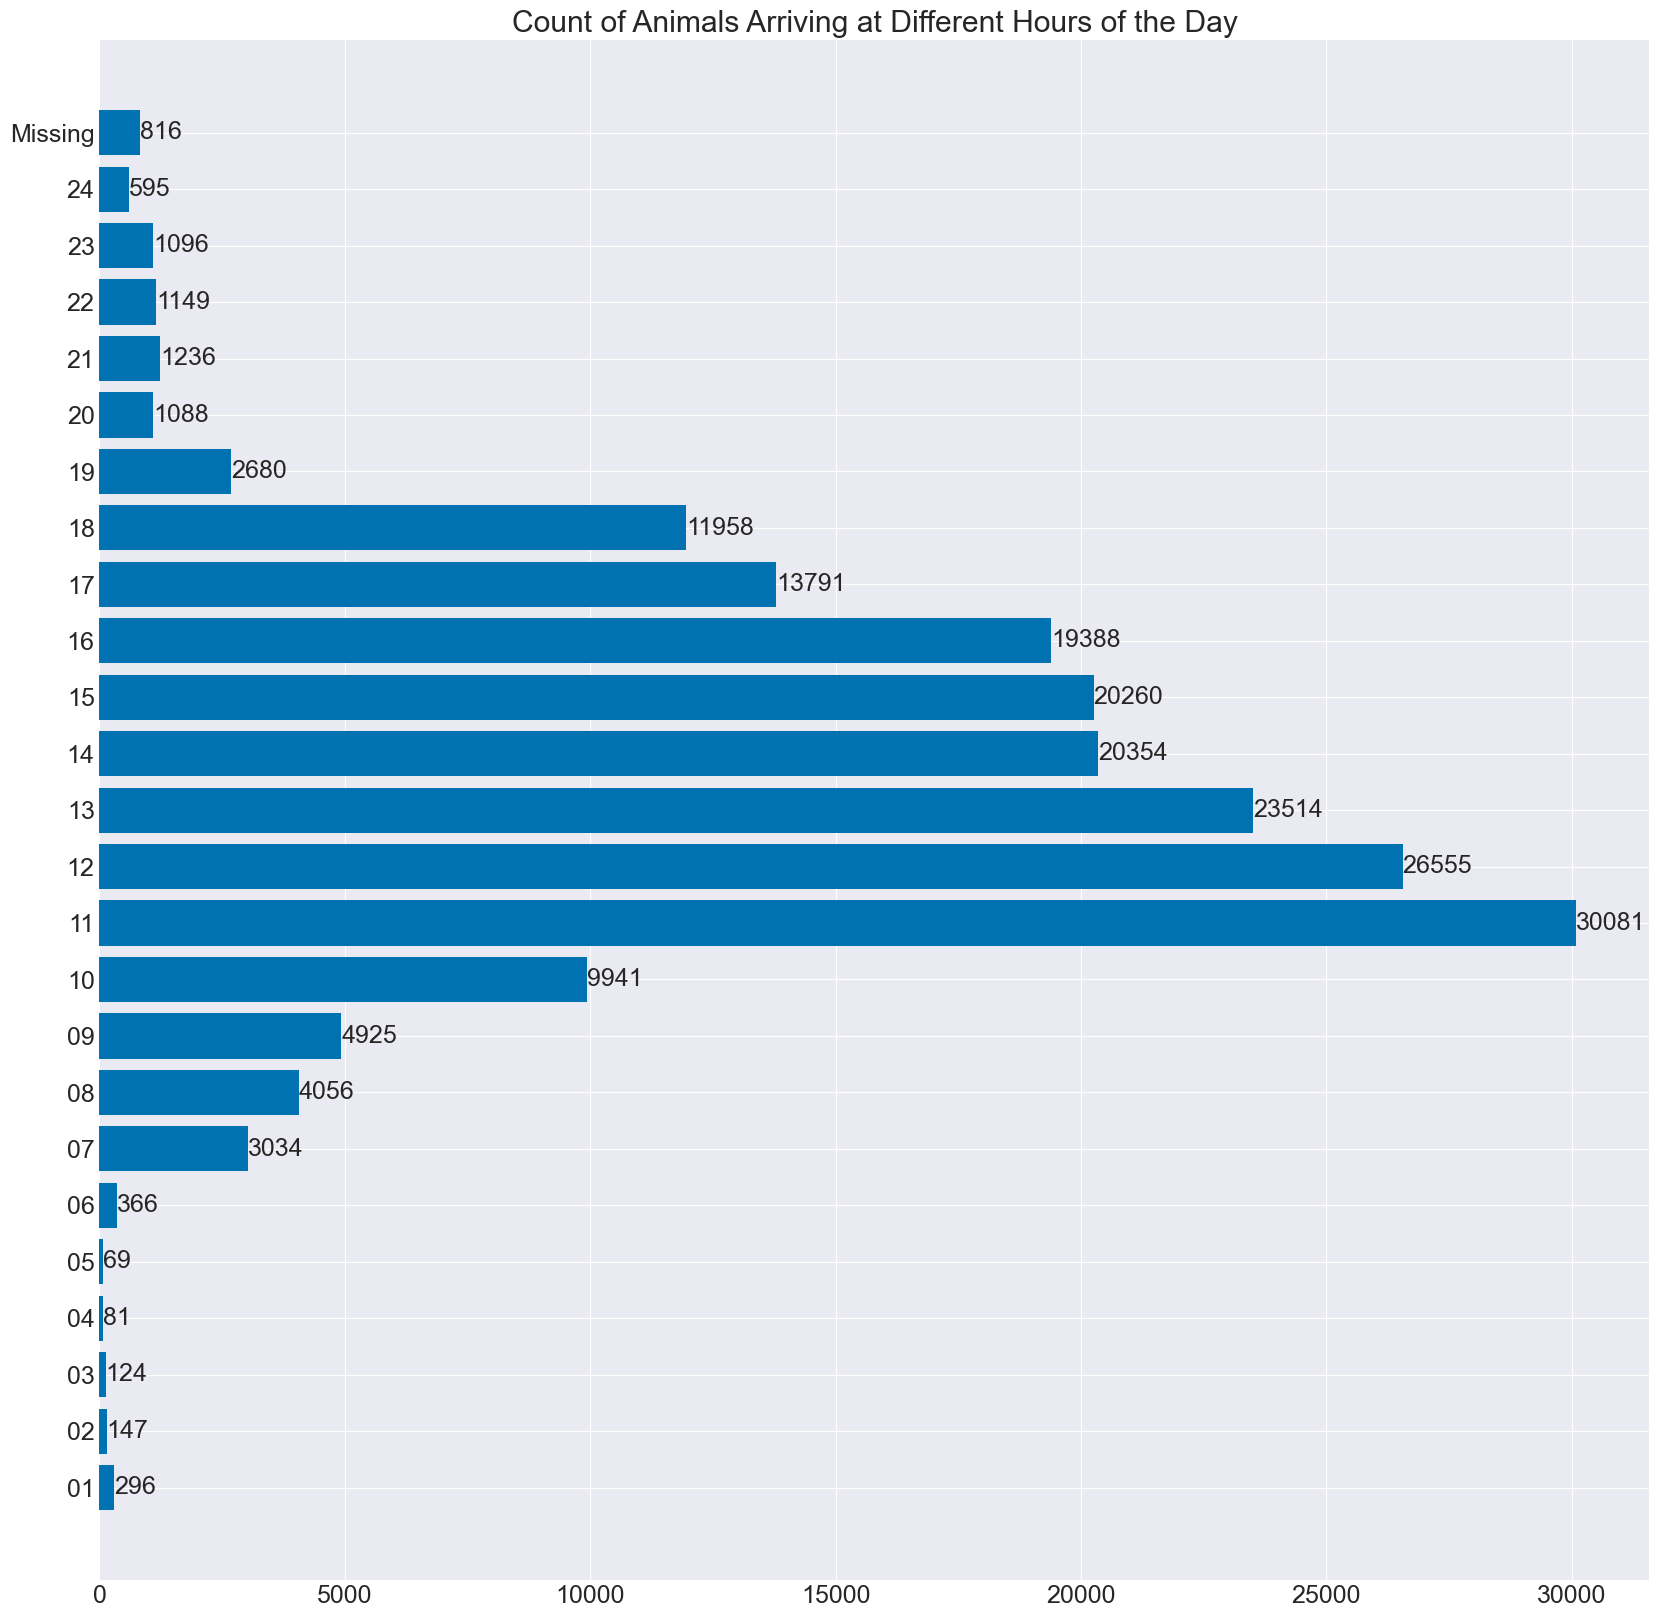

In [26]:
from charts import sidebarplot

data.reset_dataset()
values, labels = analysis.cat_count("in_hour")
sidebarplot(values, labels, "Count of Animals Arriving at Different Hours of the Day", figsize=(20, 20), sort_by="label")


### 2c. What are the most common conditions in which animals enter the shelter?

<!-- **Optional:** It might be helpful to express your counts as a percentage (i.e. each condition accounts for X percent of animals that enter). If you do this, use the [np.round](https://numpy.org/doc/stable/reference/generated/numpy.round.html) function to round the percentages to 2 decimal places (otherwise the plot will look cluttered!). -->

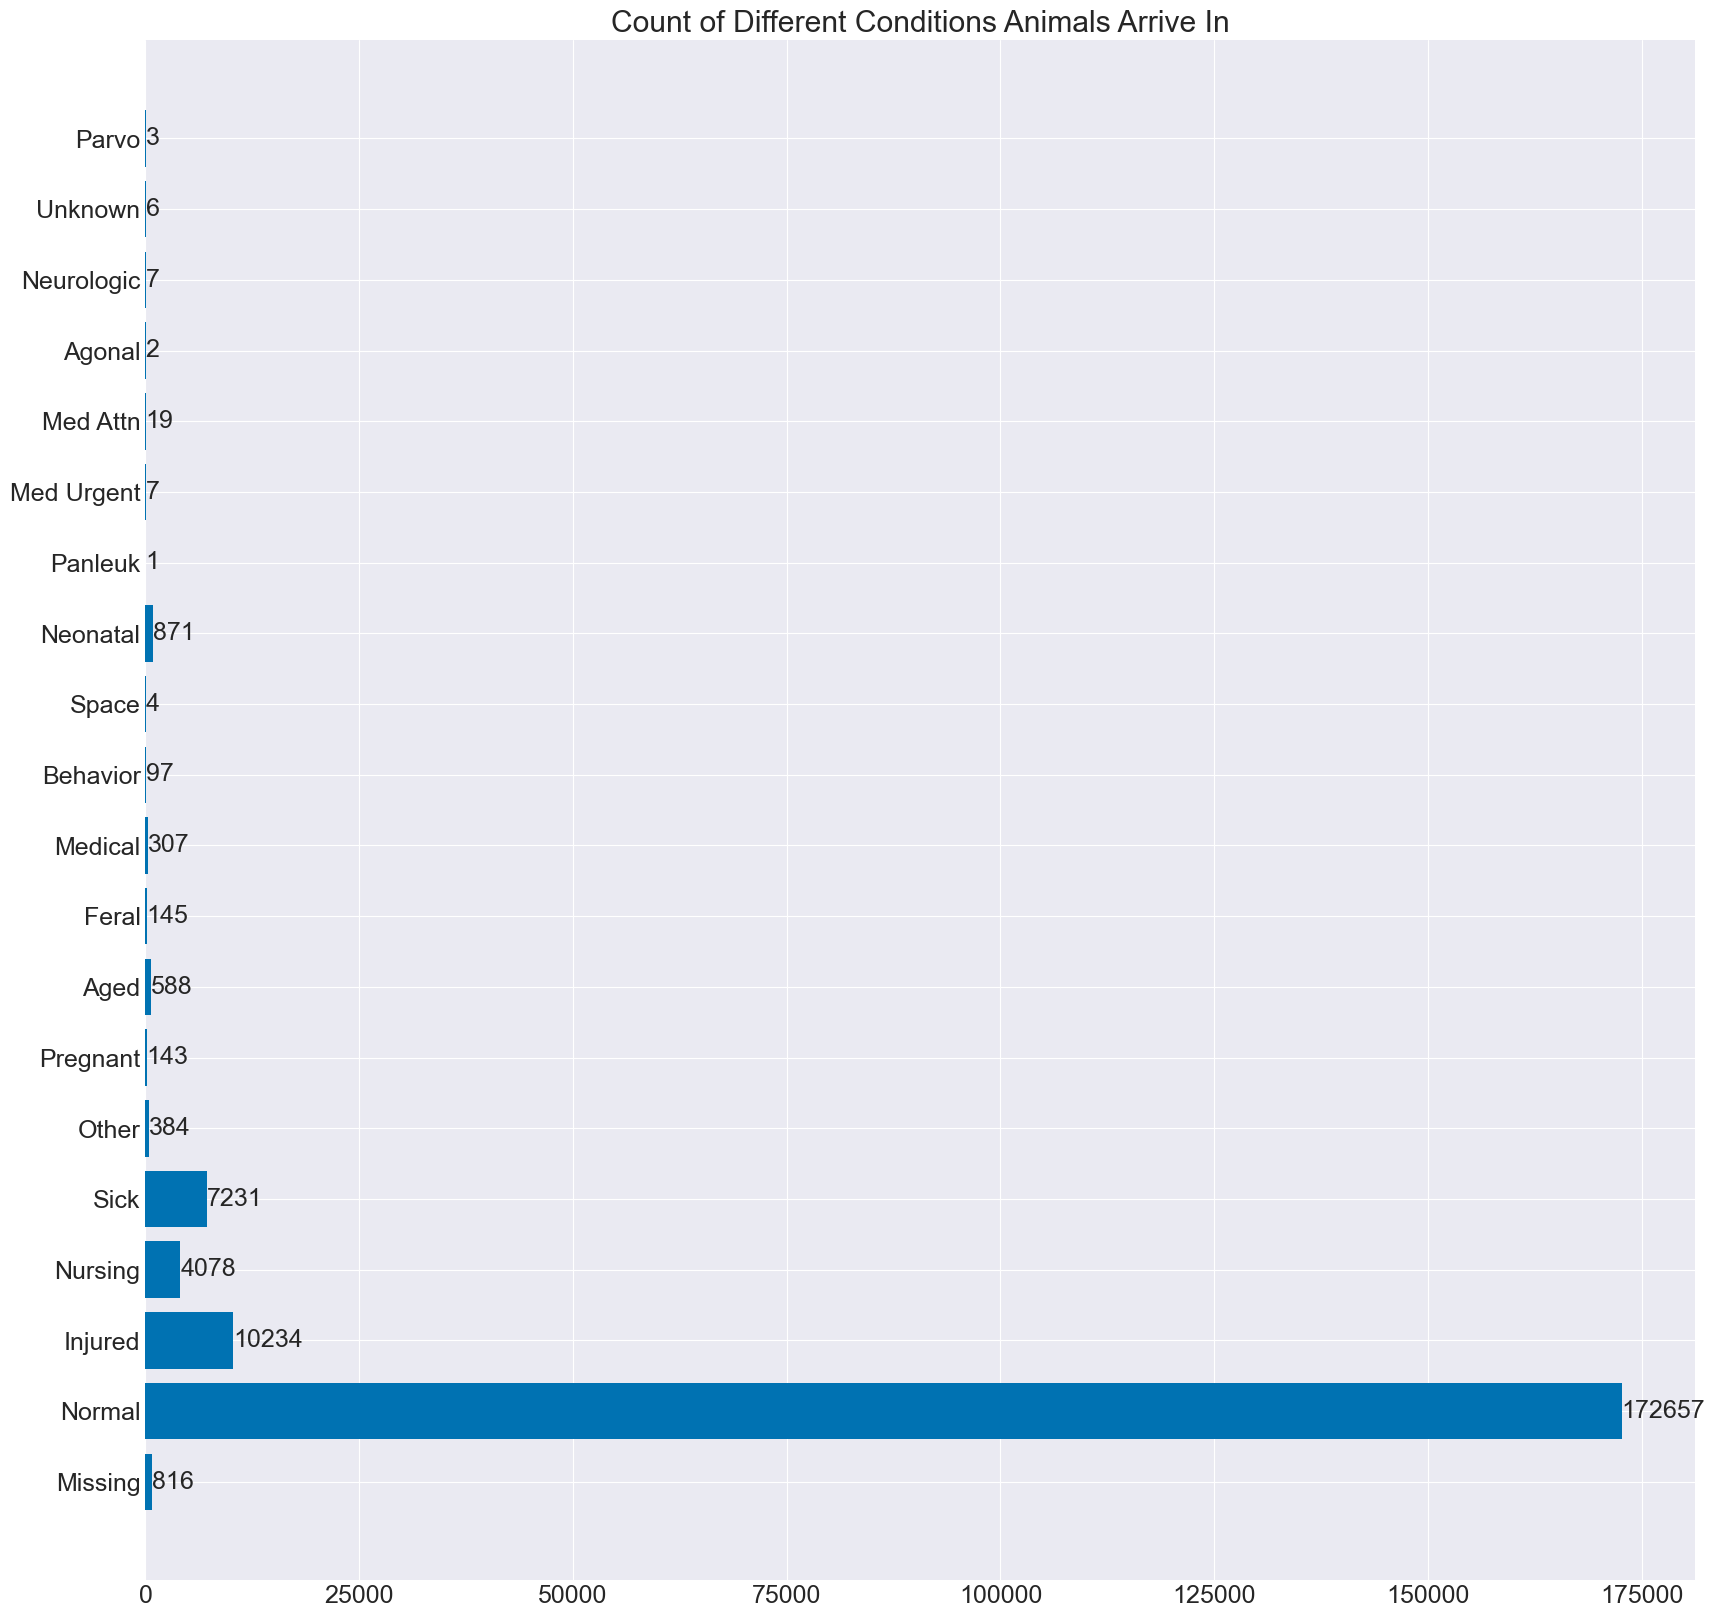

In [28]:
data.reset_dataset()
values, labels = analysis.cat_count("in_condition")
sidebarplot(values, labels, "Count of Different Conditions Animals Arrive In", figsize=(20, 20))

The first 4 most common conditions in which animals enter the shelter are `Normal`, `Injured`, `Sick`, and `Nursing`.

### 2d. What are the top reasons that animals enter the shelter when they arrive in Normal condition?

<!-- **Optional:** It might be helpful to express your counts as a percentage. If you do this, use the [np.round](https://numpy.org/doc/stable/reference/generated/numpy.round.html) function to round the percentages to 2 decimal places (otherwise the plot will look cluttered!). -->

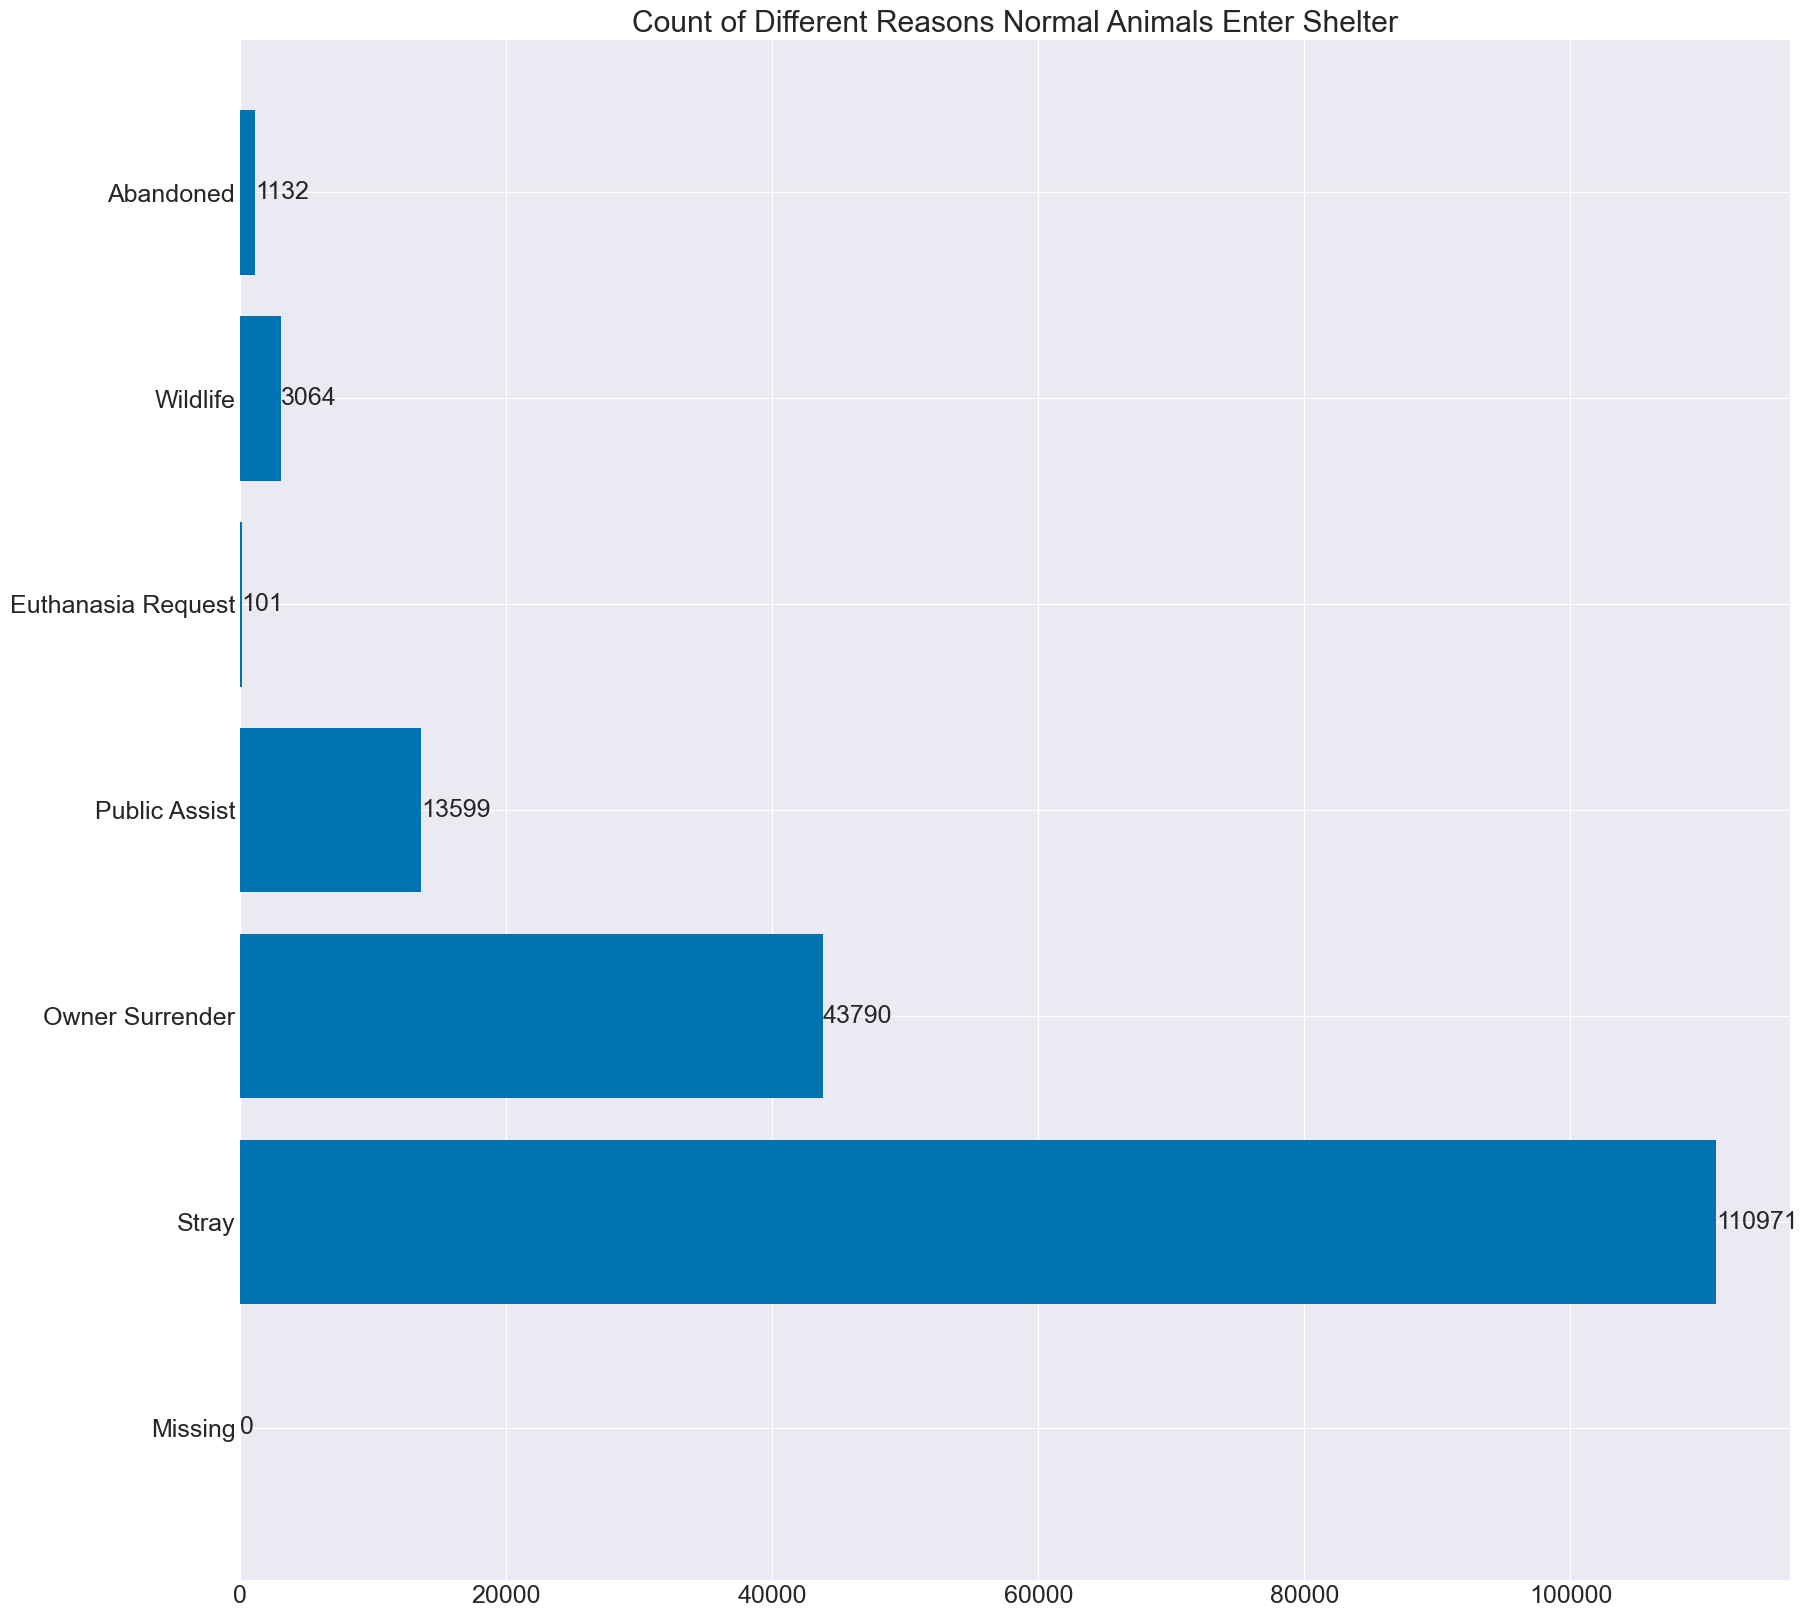

In [30]:
data.reset_dataset()
data.filter("in_condition", "Normal")
values, labels = analysis.cat_count("in_reason")
sidebarplot(values, labels, "Count of Different Reasons Normal Animals Enter Shelter", figsize=(20, 20))

The top 4 reasons normal animals arrive at the shelter are `Stray`, `Owner Surrender`, `Public Assist`, and `Wildlife`.

## Task 3: Exploratory data analysis of the Austin Pet dataset focusing on the factors that are associated with animal adoption

Continue with the same procedure as in Task 2 (i.e. selecting variable(s), analysis technique(s), make one plot, interpret), but this time focusing on exploring the factors associated with the animal adoption outcome.

**Reminder:** Start by resetting the dataset even if you are not filtering the dataset to avoid accidental effects.

### 3a. How many animals end up with each outcome when they leave the shelter?

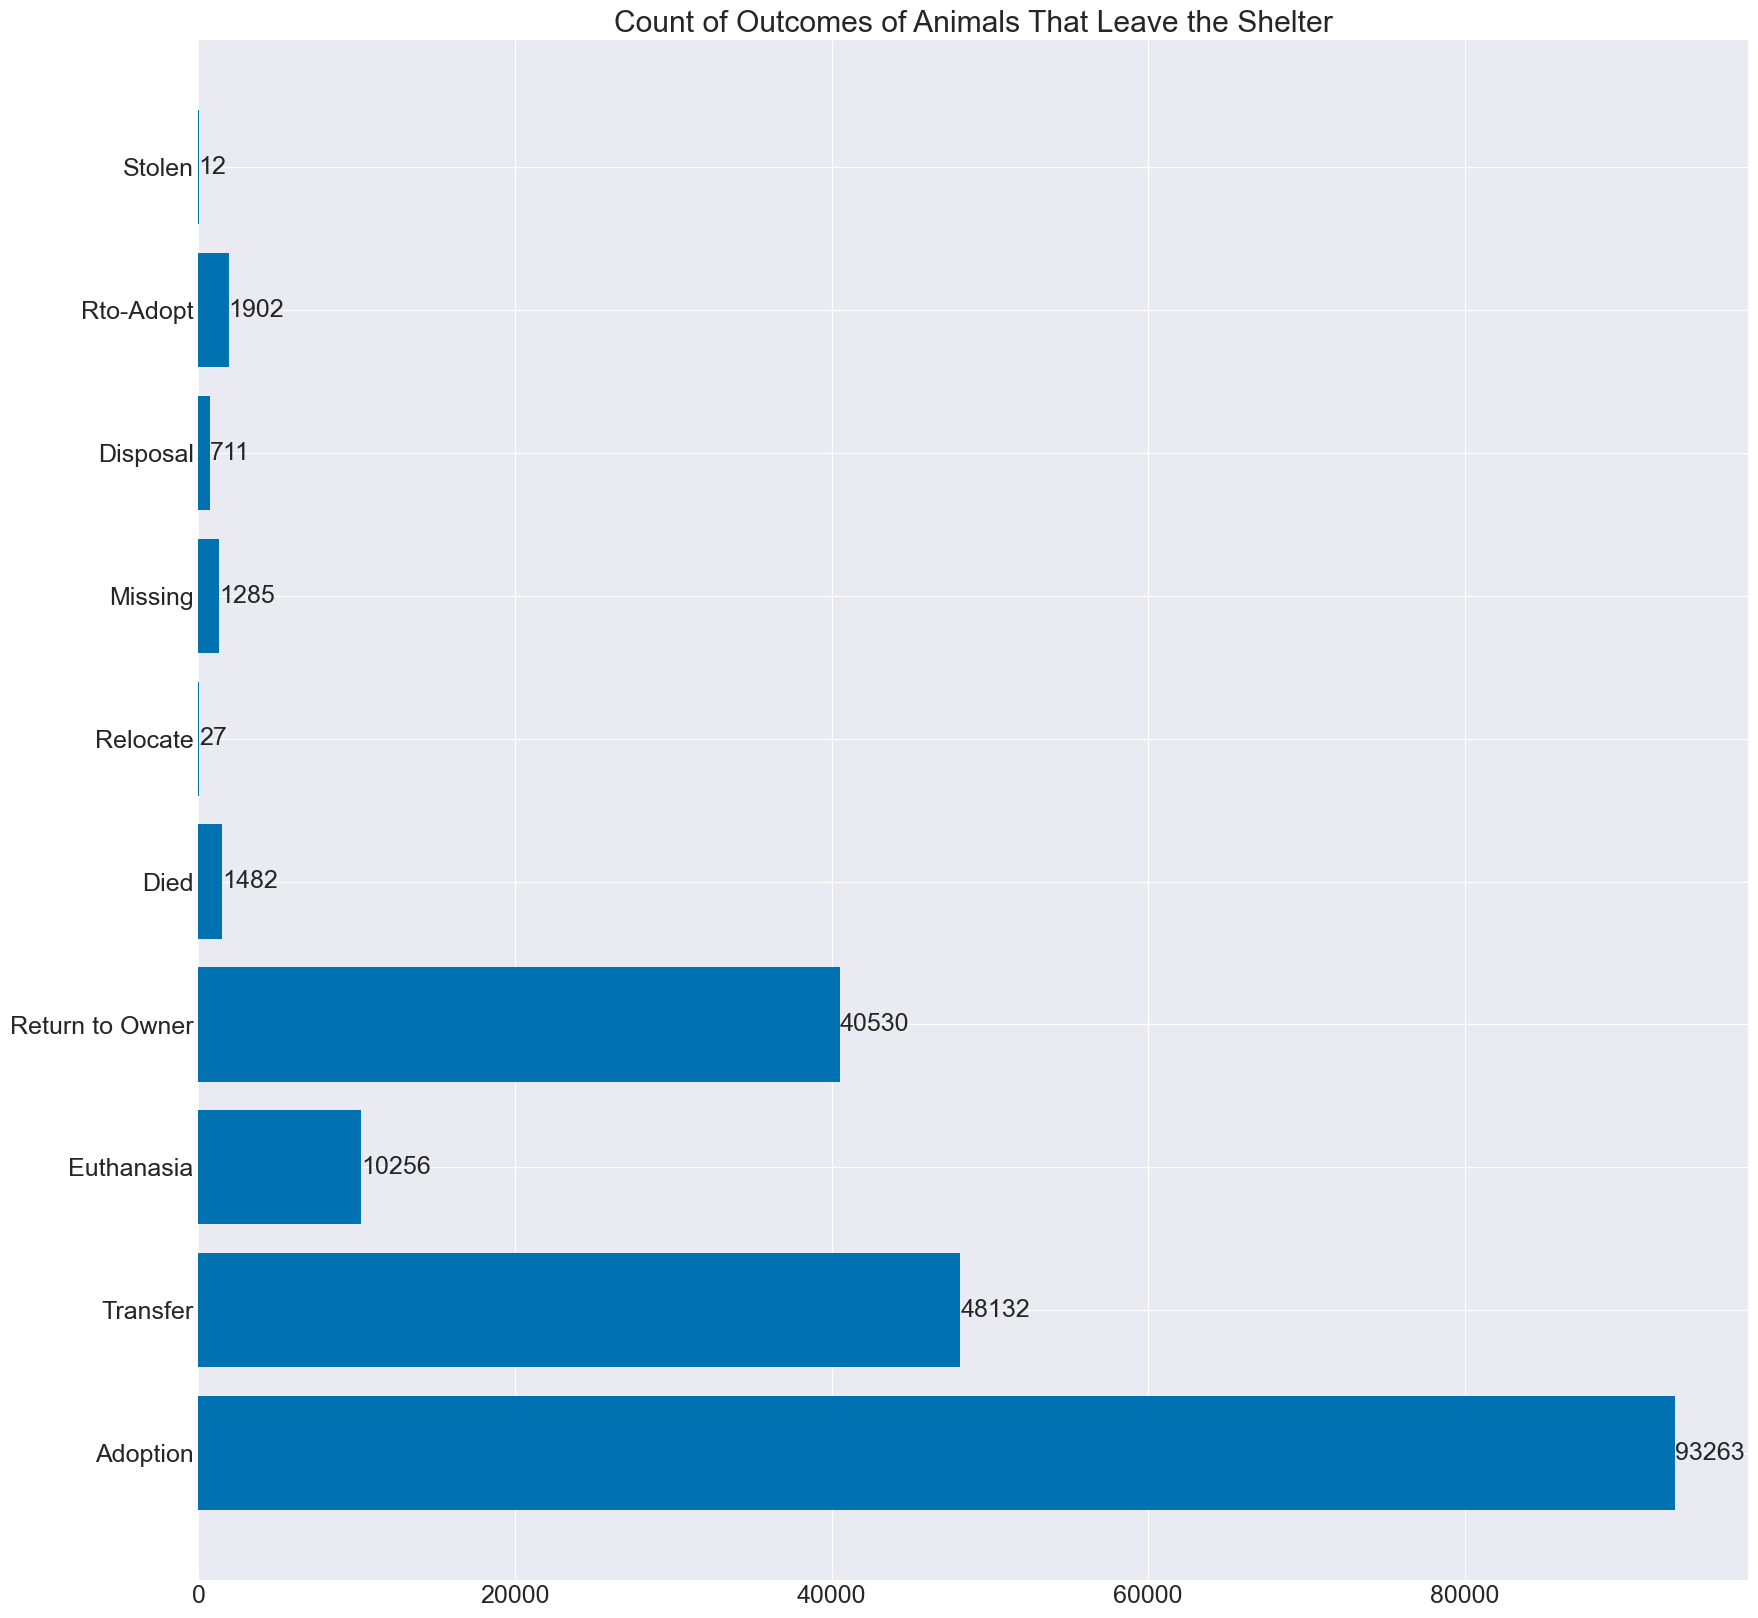

In [32]:
data.reset_dataset()
values, labels = analysis.cat_count("outcome")
sidebarplot(values, labels, "Count of Outcomes of Animals That Leave the Shelter", figsize=(20, 20))

The barplot above shows the number of animals that end up with each outcome when leaving the shelter.

### 3b. How many animals of each type have been adopted?

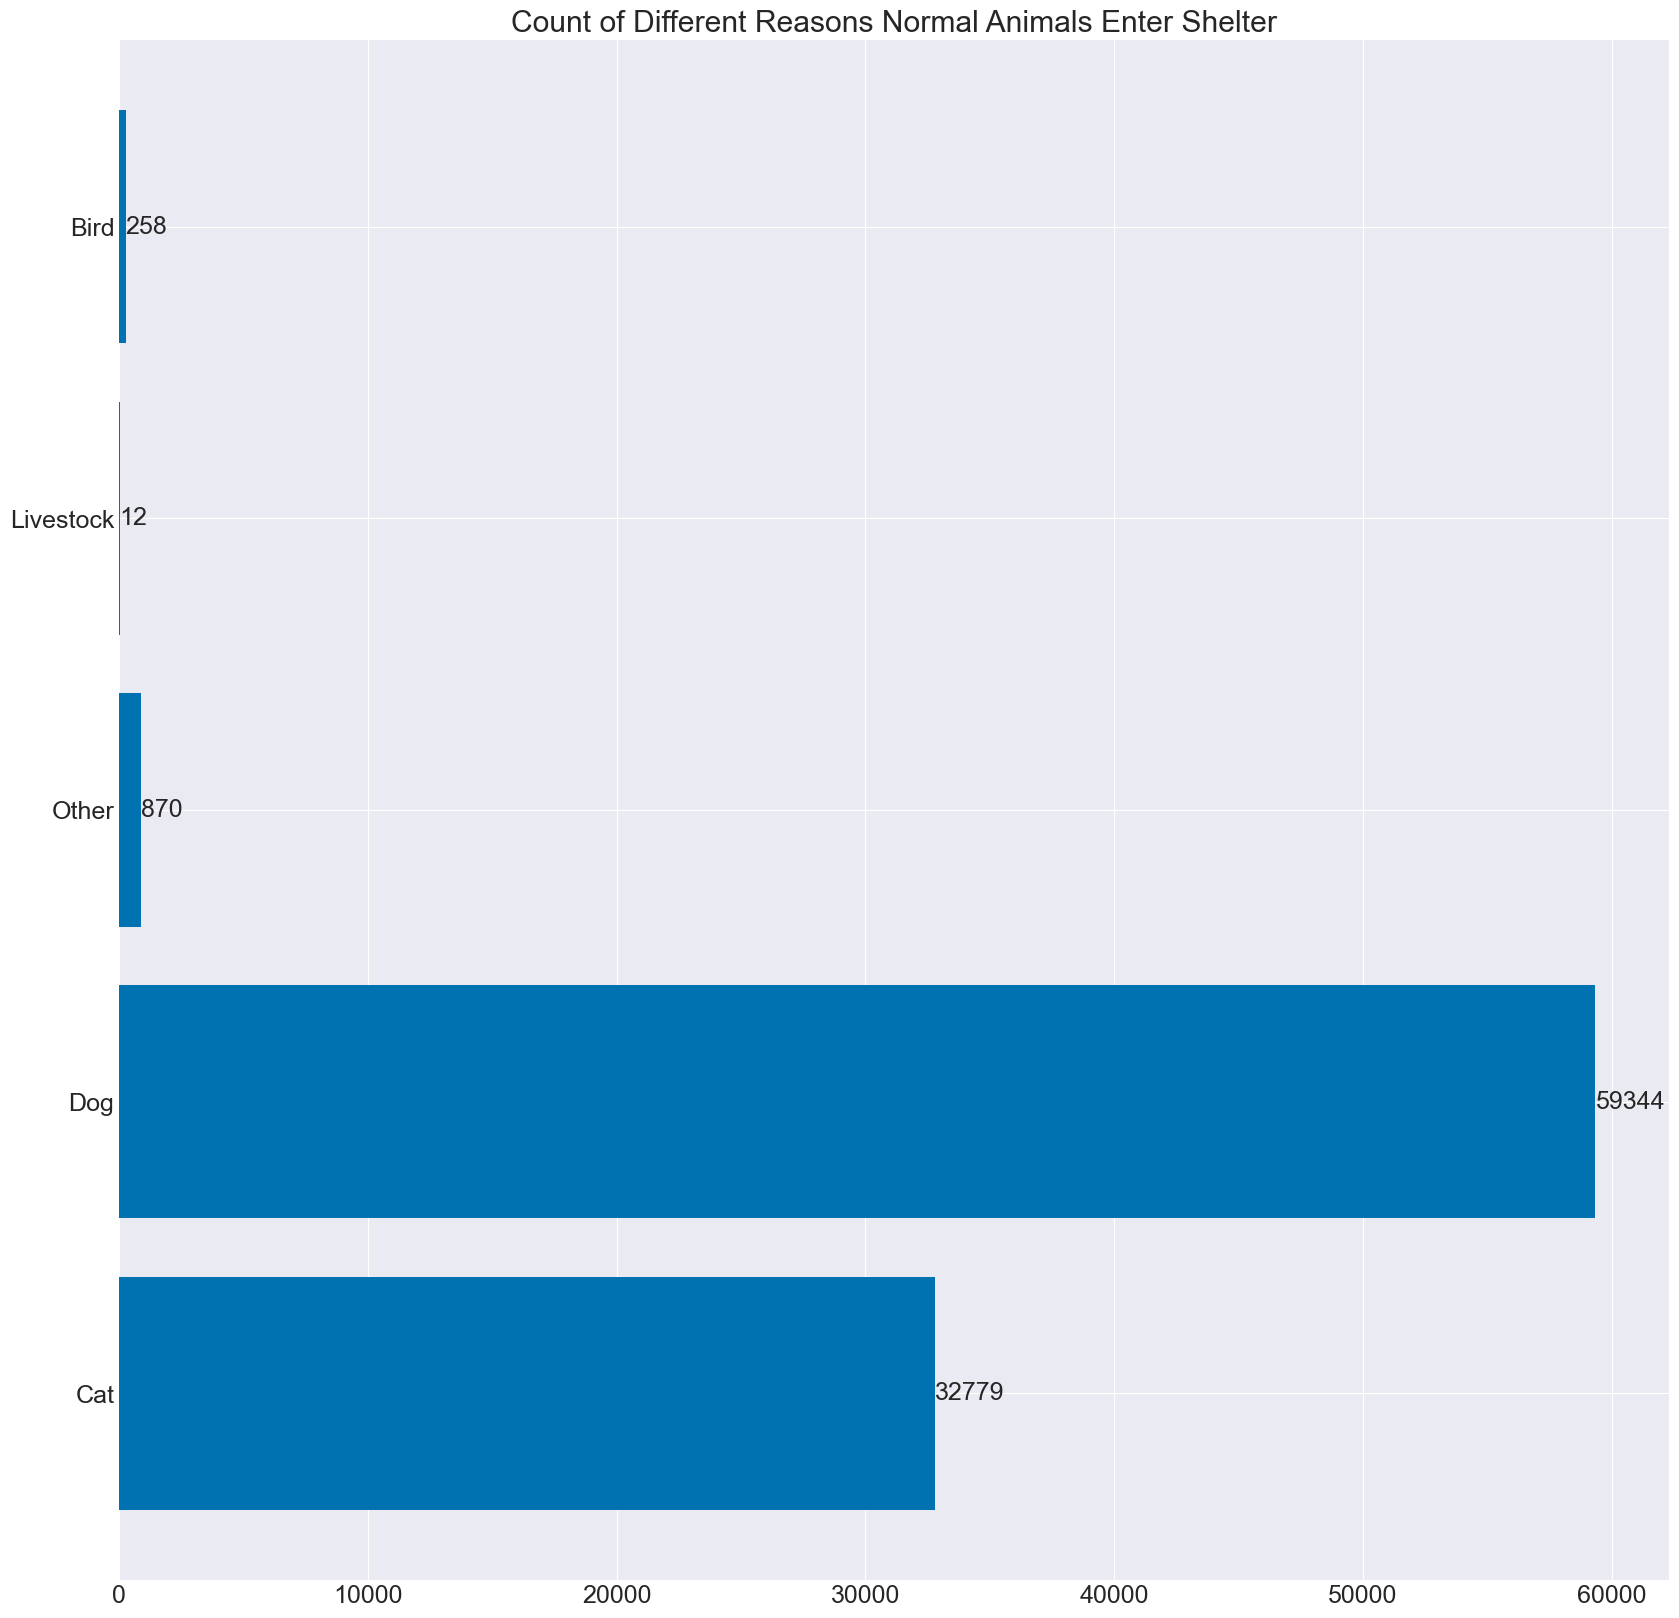

In [34]:
data.reset_dataset()
data.filter("outcome", "Adoption")
values, labels = analysis.cat_count("animal_type")
sidebarplot(values, labels, "Count of Adopted Animals of Each Type", figsize=(20, 20))

## Extensions

### a. AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. **You must describe what you did and what you found in detail**.
2. Include (*labeled!*) plots and/or numbers to present your results.
3. Write up your extensions below or in a separate notebook.
4. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Use exploratory data analysis to gain insight about other questions that you formulate about the Austin Pet dataset

Use plots to support your investigation and observations.

### 2. Use exploratory data analysis to explore your own dataset of choice

### 3. Limit bar chart to showing top-k values

Some analyses are hindered by the large number of levels in some categorical variables in the Austin Pet dataset. Add a keyword argument to `sidebarplot` to optionally limit the number of bars plotted to the top-k largest values passed in. Once this is implemented, use this functionality to address questions like what are the 10 most common breeds of dog that been adopted?

### 4. `__str__` method

Update your `__str__` method to show the string representations of categorical variable levels when you print `CatData` objects.

### 5. Variability and visualizing error bars in bar plots

- Create a `cat_var` method modeled off of `cat_mean` that computes the standard deviation of a numeric variable within categorical groups.
- Add support for plotting error bars to show the standard deviations in `sidebarplot`.
- Demonstrate this added functionality with one or more explorations.

### 6. Box-and-Whisker plot

Create a function that generates a box-and-whisker plot using matplotlib and make use of it in an analysis of the Austin Pet dataset.

### 7. Count samples according to levels from two categorical levels

For example, how many Dogs, Cats, and Birds left the shelter every year since 2013? This kind of question involves counting samples that have different combinations of levels from two categorical variables (`animal_type` and `out_year` in this case).

Write `cat_count2` to implement support for this type of analysis.

Create a new plotting function to visualize the results using a side-by-side bar chart. [Here is an example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html).

### 8. Compute means within categorical groups

Write code that computes the mean of one numeric variable's values, but only include samples that have the same level of a categorical variable. Do this for all categorical levels so that if there are `C` levels for the categorical variable of interest, we have an array of `C` means, one for each level (group).

Example:
- Column of self.data for `numeric_var1` = [4, 5, 6, 1, 2, 3]
- Column of self.data for `cat_var1` = [0, 0, 0, 1, 1, 1]

If `numeric_header` = "numeric_var1" and `categorical_header` = "cat_var1", this method should return `means` = [5, 2]. (1st entry is mean of all numeric var values with corresponding int level of 0, 2nd entry is mean of all numeric var values with corresponding int level of 1)